CSE-221710304014-C.Tharun Kumar Reddy

Now the factory produces a new paper tissue with X1 value as 3 and X2 value as 7. What is the classification of this new tissue(Good or Bad).x1=AcidDurab,x2=strength,y=classi


a.Calculate the distance between the query instance(3,7) and all the training samples.

b.Sort the distance and determine nearest neighbor based on k

c.Gather the y category of nearest neighbor and that category becomes the predicted class of query instance

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.DataFrame({'AcidDurab':[7,7,3,1],'strength':[7,4,4,4],'classi':['bad','bad','good','good']})
df


,AcidDurab,strength,classi
0,7,7,bad
1,7,4,bad
2,3,4,good
3,1,4,good


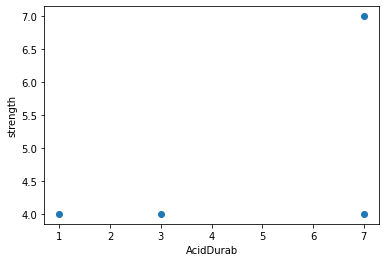

In [3]:
plt.xlabel("AcidDurab")
plt.ylabel("strength")
plt.scatter(df.AcidDurab,df.strength)
plt.show()

In [4]:
import math


In [5]:
nx1=3
nx2=7
dist=[]
for i in range(df.shape[0]):
    v=math.sqrt((nx1-df.iloc[i,0])**2+(nx2-df.iloc[i,1])**2)
    dist.append(v)

In [6]:
dist

[4.0, 5.0, 3.0, 3.605551275463989]

In [7]:
df['dist']=dist
df

,AcidDurab,strength,classi,dist
0,7,7,bad,4.000000
1,7,4,bad,5.000000
2,3,4,good,3.000000
3,1,4,good,3.605551


In [8]:
df.sort_values("dist",inplace=True)
df

,AcidDurab,strength,classi,dist
2,3,4,good,3.000000
3,1,4,good,3.605551
0,7,7,bad,4.000000
1,7,4,bad,5.000000


1.If k=1 nearest neighbor, what would be the classification of new paper tissue

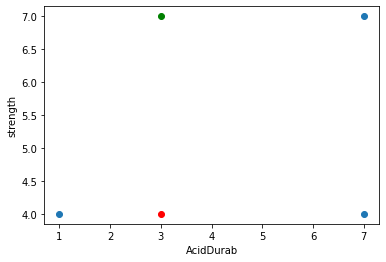

In [9]:
plt.xlabel("AcidDurab")
plt.ylabel("strength")
plt.scatter(df.iloc[1:,0],df.iloc[1:,1])
plt.scatter(pd.Series(nx1),pd.Series(nx2),color="green")
plt.scatter(pd.Series([df.iloc[0,0]]),pd.Series([df.iloc[0,1]]),color='red')
plt.show()


When k=1 from (3,7) point
Then (3,4) is the only point i.e., (3,4) is the nearest point for the (3,7) point
(3,4) is classified as Good so , we will consider (3,7) also as Good

2.If k=3 nearest neighbors, what would be the classification of new paper tissue

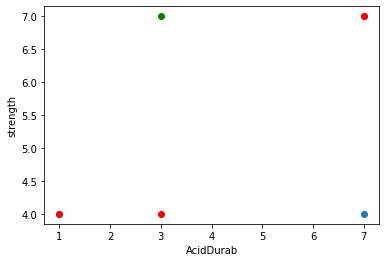

In [10]:
plt.xlabel("AcidDurab")
plt.ylabel("strength")
plt.scatter(df.iloc[1:,0],df.iloc[1:,1])
plt.scatter(pd.Series(nx1),pd.Series(nx2),color="green")
plt.scatter(df.iloc[0:3,0],df.iloc[0:3,1],color='red')
plt.show()


When k=3 from (3,7) point
Then (3,4),(1,4) and (7,7) are the point nearest to (3,7)
(3,4) is classified as Good so , we will consider (3,7) has Goodpoints=1
(1,4) is classified as Good so , we will consider (3,7) has Goodpoints=2
(7,7) is classified as Good so , we will consider (3,7) has badpoints=1
Since Goodpoints>badpoints, we will consider (3,7) as Good